## A tutorial to visualize one-shot learning results

### Goal
- Compare one-shot learning with zero-shot learning
- To visualize the different

### Approach
- Directly generate a DOT file from one-shot learning example completed in previous tutorial

### Step 1: Download libraries and files for the lab
- Make use you download necessary library and files. 
- All downloaded and saved files can be located in the `content` folder if using google Colab

In [17]:
# uncomment the commands to download libraries and files
#!pip install python-dotenv
#!pip install dspy-ai
#!pip install graphviz

import dspy
import os
import openai
import json
from dotenv import load_dotenv
from graphviz import Source
from IPython.display import display

In [18]:
def set_dspy():
    # ==============set openAI enviroment=========
    # Path to your API key file
    key_file_path = "openai_api_key.txt"

    # Load the API key from the file
    with open(key_file_path, "r") as file:
        openai_api_key = file.read().strip()

    # Set the API key as an environment variable
    os.environ["OPENAI_API_KEY"] = openai_api_key
    openai.api_key = os.environ["OPENAI_API_KEY"]
    turbo = dspy.OpenAI(model="gpt-3.5-turbo", max_tokens=2000, temperature=0)
    dspy.settings.configure(lm=turbo)
    return turbo
    # ==============end of set openAI enviroment=========


def set_dspy_hardcode_openai_key():
    os.environ["OPENAI_API_KEY"] = (
        "sk-proj-yourapikeyhere"
    )
    openai.api_key = os.environ["OPENAI_API_KEY"]
    turbo = dspy.OpenAI(model="gpt-3.5-turbo",  temperature=0, max_tokens=2000)
    dspy.settings.configure(lm=turbo)
    return turbo

turbo=set_dspy()
# comment out set_dspy() and use set_dspy_hardcode_openai_key is your option
# turbo=set_dspy_hardcode_openai_key()

In [19]:
def load_text_file(file_path):
    """
    Load a text file and return its contents as a string.

    Parameters:
    file_path (str): The path to the text file.

    Returns:
    str: The contents of the text file.
    """
    try:
        with open(file_path, "r") as file:
            contents = file.read()
        return contents
    except FileNotFoundError:
        return "File not found."
    except Exception as e:
        return f"An error occurred: {e}"


In [20]:
conversation = load_text_file("04_output_for_viz.json")
print(conversation)

[
    {
        "type": "identity",
        "id": "identity--1cba2e3c-4bdb-4d0b-a87b-2d504ad5923f",
        "name": "OurCompany",
        "identity_class": "organization",
        "sectors": [
            "technology"
        ],
        "contact_information": "info@ourcompany.com"
    },
    {
        "type": "email-addr",
        "id": "email-addr--0c0d2094-df97-45a7-9e9c-223569a9e798",
        "value": "hr-dept@ourcompany-security.com"
    },
    {
        "type": "email-message",
        "id": "email-message--c79b6bde-4f4c-4b38-a8c8-fb82921d6b97",
        "is_multipart": false,
        "subject": "Urgent Benefits Package Update",
        "from_ref": "email-addr--0c0d2094-df97-45a7-9e9c-223569a9e798",
        "body": "Please click the link to review the changes to your benefits package."
    },
    {
        "type": "url",
        "id": "url--4c3b-4c4b-bb6c-ded6b2a4a567",
        "value": "http://phishing-link.com/login"
    },
    {
        "type": "user-account",
        "id": "use

In [21]:
class DotGenerator(dspy.Signature):
    """Generate a evidence knowledge graph based on a cyber incident expressed in Structured Threat Information Expression (STIX)."""

    question: str = dspy.InputField(
        desc="a cyber incident expressed in Structured Threat Information Expression with JSON format."
    )

    answer: str = dspy.OutputField(
        desc="a graph in a dot format. The nodes of the graph are evidence entities in STIX or Cyber Forensic Domain Objects and Cyber Forensic Observable Objects in DFKG and the edges of the graph are the relationships between evidence entities in STIX. A dot format is primarily associated with Graphviz, a graph visualization software. For example, a dot should looks like: digraph incident_name {...}. Don't include `````` "
    )

In [22]:
# Important: Predict is better than ChainOfThough
def generate_answer_CoT(signature, text, output_file):
    generate_answer = dspy.Predict(signature)
    answer = generate_answer(question=text).answer  # here we use the module

    with open(output_file, "w") as dot_file:
        print(answer)
        dot_file.write(answer)
        return answer
    print(f"The evidence has been saved to the file {output_file}")

In [23]:
output_file = "05_output.dot"
dot_description = generate_answer_CoT(
    DotGenerator,
    conversation,
    output_file,
)

digraph phishing_attack {
    "OurCompany" [label="OurCompany\norganization\ninfo@ourcompany.com"]
    "hr-dept@ourcompany-security.com" [label="hr-dept@ourcompany-security.com"]
    "email-message--c79b6bde-4f4c-4b38-a8c8-fb82921d6b97" [label="email-message\nUrgent Benefits Package Update\nFrom: hr-dept@ourcompany-security.com\nPlease click the link to review the changes to your benefits package."]
    "http://phishing-link.com/login" [label="http://phishing-link.com/login"]
    "Taylor" [label="Taylor\ntaylor@ourcompany.com"]
    
    "hr-dept@ourcompany-security.com" -> "email-message--c79b6bde-4f4c-4b38-a8c8-fb82921d6b97"
    "email-message--c79b6bde-4f4c-4b38-a8c8-fb82921d6b97" -> "http://phishing-link.com/login"
    "Taylor" -> "hr-dept@ourcompany-security.com"
    
    "Phishing Email Indicator" [label="Phishing Email Indicator\nPattern: [email-message:subject = 'Urgent Benefits Package Update']\nValid From: 2024-07-17T00:00:00Z"]
    "Phishing Attack on OurCompany" [label="Phis

Graph saved as: 05_output_stix_oneshot.png


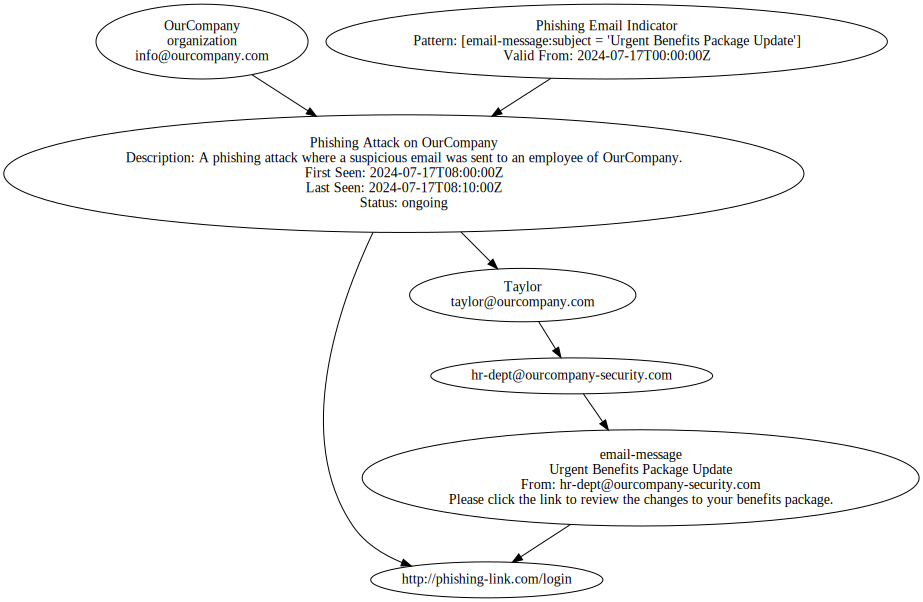

In [29]:
# Load the .DOT file
dot_file_path = "05_output.dot"

with open(dot_file_path, "r") as file:
    dot_content = file.read()

# Create a Graphviz Source object and render it
dot = Source(dot_content)

# Render the graph and save it as a PNG file
output_file_path = "05_output_stix_oneshot"
dot.format = "png"
dot.render(output_file_path, cleanup=True)

# Display the saved PNG file path
print(f"Graph saved as: {output_file_path}.png")

# Display the graph in the Jupyter notebook
dot

In [ ]:
from IPython.display import Image

# Path to the image file
image_path = "path/to/your/image.png"

# Display the image
Image(filename=image_path)

# Summary

, e.g., [Digital Forensic Knowledge Graph (DFKG)](https://github.com/frankwxu/digital-forensics-lab/tree/main/STIX_for_digital_forensics). 